# Health Spending and Life Expectancy Data

## Introduction

Based on matplotlib, Seaborn is a Python data structure library for data visualization that works well with pandas. The main component of Seaborn that aids in data exploration and understanding is visualization.
To illustrate Seaborn and its powerful plotting capabilities,it is helpful to have example datasets readily available for plotting.For this, Seaborn provides a simple-to-use interface for loading datasets into Pandas dataframes.

A crucial factor in determining a country's health is its life expectancy. The datasets include information on life expectancy for the population from 1970 and 2000,and also healthcare expenditure for the corresponding country.


### Objective

The goal is to perform an exploratory data analysis, by answering the following questions.

1. What changes have occurred in healthcare spending over time?

2. How has life expectancy changed over time?

3. Do health spending and life expectancies have any correlation?

4. What were the average, lowest, and maximum life expectancies by country?



In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import and Explore the dataset and extract insights using Exploratory Data Analysis
- Data Overview
  - View the first and last five rows of the dataset
  - Check the shape of the dataset
- Check for missing values

In [4]:
#Import and look at life expectancy data
health_exp = sns.load_dataset('healthexp')
health_exp.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
health_exp.tail(5)

,Year,Country,Spending_USD,Life_Expectancy
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7
273,2020,USA,11859.179,77.0


In [6]:
health_exp.shape

(274, 4)

##### Observation:
The dataset has 274 rows and 4 columns

In [7]:
#check if there are nulls
health_exp.isnull().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

In [9]:
#check if there are duplicates
health_exp.duplicated().sum()

0

##### Observation:
There is no null and duplicate data

### Question 1
What changes have occurred in healthcare spending over time?

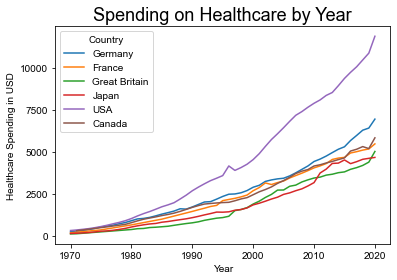

In [11]:
#lineplot of spending_USD by year

sns.lineplot(x = 'Year', y = 'Spending_USD', data = health_exp, hue = 'Country', ci = False, markers = True)
sns.set(rc={'figure.figsize': (15,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.title("Spending on Healthcare by Year")
plt.xlabel('Year')
plt.ylabel('Healthcare Spending in USD') 
plt.show()

##### Observation:
There is an increase in spending over the years. 

### Question 2
How has life expectancy change over time?

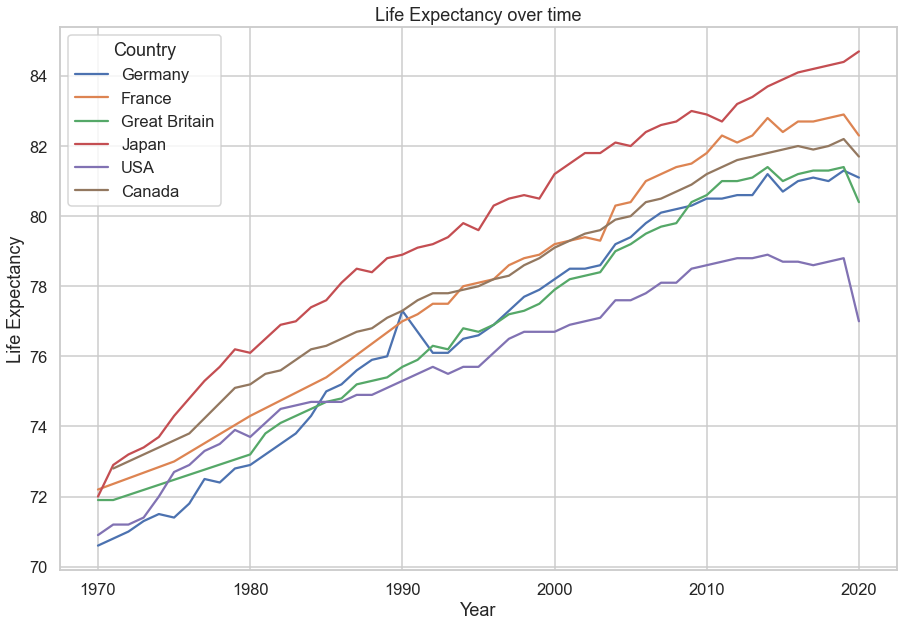

In [13]:
#Create lineplot of life expectancy by year
sns.lineplot(x = 'Year', y = 'Life_Expectancy', data = health_exp, hue = 'Country', ci = False, markers = True)
sns.set(rc={'figure.figsize': (15,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.title("Life Expectancy over time")
plt.xlabel('Year')
plt.ylabel('Life Expectancy') 
plt.show()

##### Observation
There has been increase in life expectancy over the years.

### Question 3

Do health spending and life expectancies have any correlation?

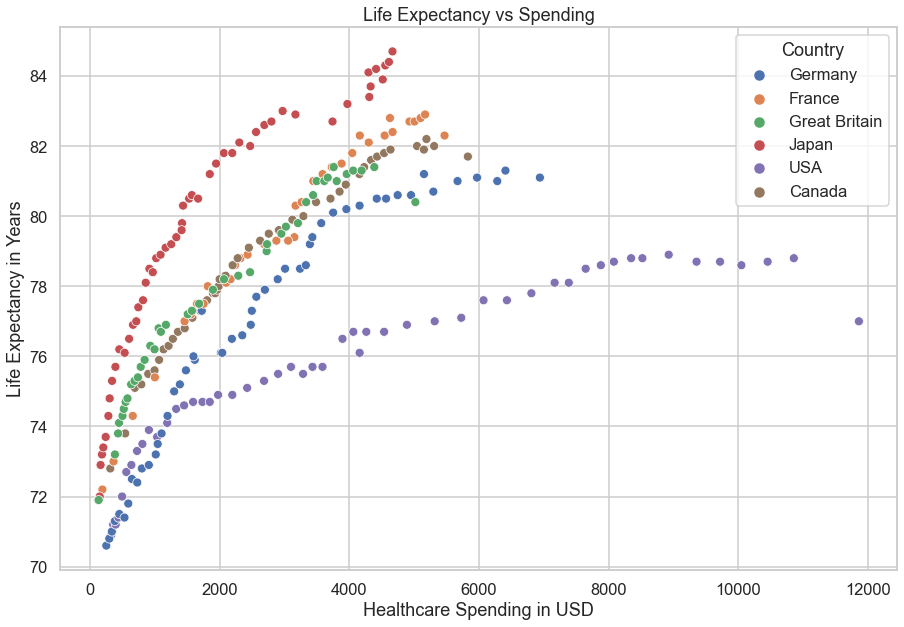

In [14]:
#scatterplot of spending and life expectancy
sns.scatterplot(x = 'Spending_USD' , y = 'Life_Expectancy', data = health_exp, hue = 'Country')
sns.set(rc={'figure.figsize': (10,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.title("Life Expectancy vs Spending")
plt.xlabel('Healthcare Spending in USD')
plt.ylabel('Life Expectancy in Years') 
plt.show()

In [15]:
#Is there a relationship between spending and life expectancy?
health_exp[['Spending_USD', 'Life_Expectancy']].corr()


,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.57943
Life_Expectancy,0.57943,1.00000


##### Observation:

There is a moderate correllation between the two variables(Spending_Usd and Life_Expectancy), where r = 0.58

In [16]:
#What is the correlation between spending and life expectancy by country?
#create a function to determine correlation by country
def correlation (country):
    temp_df = health_exp[health_exp["Country"]== country] #create a dataframe subset of country
    country_correlation = temp_df[['Spending_USD', 'Life_Expectancy']].corr() #calculates correlation
    return country_correlation #prints correlation

In [17]:
correlation('Germany')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.939061
Life_Expectancy,0.939061,1.000000


In [18]:
correlation('France')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.969428
Life_Expectancy,0.969428,1.000000


In [19]:
correlation('Great Britain')

,Spending_USD,Life_Expectancy
Spending_USD,1.00000,0.95798
Life_Expectancy,0.95798,1.00000


In [20]:
correlation('Japan')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.914187
Life_Expectancy,0.914187,1.000000


In [21]:
correlation('USA')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.906852
Life_Expectancy,0.906852,1.000000


In [22]:
correlation('Canada')

,Spending_USD,Life_Expectancy
Spending_USD,1.000000,0.965446
Life_Expectancy,0.965446,1.000000


### Question 4

What were the average, lowest, and maximum life expectancies by country?

In [23]:
#create a pivot table
health_exp.pivot_table(['Life_Expectancy'], ['Country'], aggfunc = ['min','median','max'])

,min,median,max
,Life_Expectancy,Life_Expectancy,Life_Expectancy
Country,,,
Canada,72.8,78.7,82.2
France,72.2,79.4,82.9
Germany,70.6,77.1,81.3
Great Britain,71.9,77.5,81.4
Japan,72.0,79.8,84.7
USA,70.9,75.7,78.9


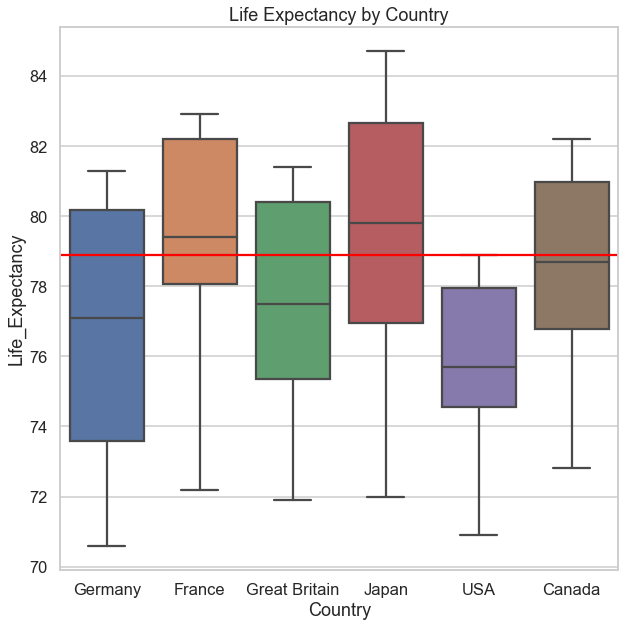

In [24]:
#boxplot by country showing life expectancy

sns.boxplot(x = 'Country', y = 'Life_Expectancy', data =health_exp, hue = 'Country', dodge = False)
sns.set(rc={'figure.figsize': (10,10)}) #set length of x and y axis
sns.set_style("whitegrid") #white background
sns.set_context("talk") #increase font size
plt.legend([],[], frameon=False) #remove legend
plt.axhline(y=78.9, color = 'red') #draw a line at USA max life expectancy
plt.title("Life Expectancy by Country")
plt.show()

##### Observation

It was discovered that Japan had the highest maximum life expectancy at 84.7 years old, while the USA had the lowest maximum life expectancy at 78.9 years old. 
A boxplot displaying life expectancy, with a red line over the maximum life expectancy for the USA was used to compare the maximum life expectancy of USA with the other countries. This demonstrated that the maximum life expectancy in the USA was shorter than the median life expectancy in France and Japan.